<a href="https://colab.research.google.com/github/Kishan-Shingala/AlmaBetter/blob/main/Solution_of_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE

I have used the NIFTY 50 index data on daily basis instead of YES bank share price, because it was on monthly basis and limited rows were in the dataset.

data source website link : https://www.niftyindices.com/reports/historical-data

You can create a shortcut of the dataset file as well, which I have kept it in my drive.

file : https://drive.google.com/file/d/1iDYrih57k5gHCCW1YiSo7lfSDAypz1pU/view?usp=sharing

# **Project Name**    -



**Project Type**    - Regression

**Contribution**    - Individual

# **Project Summary -**

**Predicting Nifty 50 Index Prices**

**Objective :**
The goal of this project was to develop a machine learning model capable of predicting daily prices of the Nifty 50 index, a benchmark index representing the performance of India’s top 50 companies listed on the National Stock Exchange (NSE).


**Data Collection and Preparation :**
- Data was collected from reliable financial sources, ensuring quality and reliability.

- The dataset included daily historical data such as open, high, low, close prices, along with financial ratios like P/E ratio, P/B ratio, and dividend yield percentage.

- Date columns were processed and transformed into datetime format, and missing values were handled appropriately (if any).

- Exploratory Data Analysis (EDA) was conducted to understand the distribution of variables and their relationships.


**Feature Engineering :**
- Various time-related features such as year, quarter, month, and day were extracted from the date column to enrich the dataset.

- Log transformation was applied to certain numerical columns to stabilize variance and improve model performance.

- Standardization was performed on financial ratios to ensure all features were on a similar scale.


**Modeling Approach :**
- Several machine learning algorithms were explored and evaluated, including Linear Regression, Lasso Regression, Ridge Regression, Gradient Boosting Regressor, and XGBoost Regressor.

- Evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and others were used to assess model performance.

- Hyperparameter tuning was performed using techniques like GridSearchCV to optimize model parameters for improved accuracy.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Predicting "NIFTY 50 Index" Price**


**Objective :**

Develop a machine learning model to predict the daily closing price of the NIFTY 50 index using historical data and relevant price ratios.

**Data :**

1. **Historical NIFTY 50 Prices**: Daily data including open, close, high, low, and volume.

2. **Price ratio**: P/E, P/B, Div.Yield %, etc.

**Goal :**

Create an accurate predictive model to provide insights for traders and investors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# We will import libararies as and when needed.

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
import pandas as pd

path = '/content/drive/MyDrive/AlmaBetter/Files/NIFTY_50_Historical_Data.csv'

df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look

df.head()


,Date,Open,High,Low,Close,P/E,P/B,Div Yield %
0,21-Jun-24,23661.15,23667.10,23398.20,23501.1,22.34,4.04,1.29
1,20-Jun-24,23586.15,23624.00,23442.60,23567.0,22.41,4.05,1.25
2,19-Jun-24,23629.85,23664.00,23412.90,23516.0,22.36,4.08,1.22
3,18-Jun-24,23570.80,23579.05,23499.70,23557.9,22.40,4.08,1.23
4,14-Jun-24,23464.95,23490.40,23334.25,23465.6,22.32,4.07,1.27


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

rows = df.shape[0]
cols = df.shape[1]

print(f'rows : {rows}')
print(f'columns : {cols}')


rows : 6340
columns : 8


### Dataset Information

In [6]:
# Dataset Info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6340 non-null   object 
 1   Open         6340 non-null   float64
 2   High         6340 non-null   float64
 3   Low          6340 non-null   float64
 4   Close        6340 non-null   float64
 5   P/E          6340 non-null   float64
 6   P/B          6340 non-null   float64
 7   Div Yield %  6340 non-null   float64
dtypes: float64(7), object(1)
memory usage: 396.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

print(f"duplicate rows : {df['Date'].duplicated().sum()}")


duplicate rows : 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

null_df = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().rename('count'))

null_df['%'] = ((null_df['count'] / len(df)) * 100).round(1)

# before cleaning
print("NULL values with % of share in dataset. \n")
print(null_df)


NULL values with % of share in dataset. 

Empty DataFrame
Columns: [count, %]
Index: []


In [9]:
# Visualizing the missing values

### What did you know about your dataset?

There is no null values in the dataframe, so we didn't visualize the missing values.

It shows that we can perform the analysis on this dataset, it is clean.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'P/E', 'P/B', 'Div Yield %'], dtype='object')

In [11]:
# Dataset Describe

df.describe()


,Open,High,Low,Close,P/E,P/B,Div Yield %
count,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000
mean,6960.785410,7002.151648,6909.665473,6957.042287,20.828565,3.610185,1.396978
std,5504.261977,5522.420976,5475.293945,5499.965350,4.886396,0.772650,0.372643
min,853.000000,877.000000,849.950000,854.200000,10.680000,1.920000,0.590000
25%,2069.862500,2086.675000,2056.175000,2069.900000,17.650000,3.090000,1.170000
50%,5475.650000,5515.125000,5426.975000,5474.900000,20.740000,3.540000,1.310000
75%,10140.600000,10179.012500,10076.300000,10127.912500,23.270000,4.040000,1.510000
max,23661.150000,23667.100000,23499.700000,23567.000000,42.000000,6.550000,3.180000


### Variables Description

Apart from first column, every other column contains value in the form of float, so it will be easy to go ahead.

### Check Unique Values for each variable.

In [12]:
# (nc_df - null count dataframe) calculate null count for each column
nc_df = df.isna().sum().to_frame(name='(null_count)')

# (uvc_df - unique value count dataframe) calculate unique value count for each column
uvc_df = df.nunique().to_frame(name='(unique_value)')

# (dt_df - data type dataframe) get data type for each column
dt_df = df.dtypes.to_frame(name='(data_type)')

# concatenate all information into a single dataframe
info_df = pd.concat([nc_df, uvc_df, dt_df], axis=1)


info_df


,(null_count),(unique_value),(data_type)
Date,0,6340,object
Open,0,6213,float64
High,0,6228,float64
Low,0,6214,float64
Close,0,6202,float64
P/E,0,1826,float64
P/B,0,418,float64
Div Yield %,0,236,float64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.set_index('Date', inplace=True)

df['Next_Close'] = df['Close'].shift(1)

df.sort_index(ascending=True, inplace=True)

df.tail()


,Open,High,Low,Close,P/E,P/B,Div Yield %,Year,Quarter,Month,Day,Next_Close
Date,,,,,,,,,,,,
2024-06-14,23464.95,23490.40,23334.25,23465.6,22.32,4.07,1.27,2024,2,6,14,23557.9
2024-06-18,23570.80,23579.05,23499.70,23557.9,22.40,4.08,1.23,2024,2,6,18,23516.0
2024-06-19,23629.85,23664.00,23412.90,23516.0,22.36,4.08,1.22,2024,2,6,19,23567.0
2024-06-20,23586.15,23624.00,23442.60,23567.0,22.41,4.05,1.25,2024,2,6,20,23501.1
2024-06-21,23661.15,23667.10,23398.20,23501.1,22.34,4.04,1.29,2024,2,6,21,NaN


### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

1. **Convert 'Date' Column to Datetime** :
   ```python
   df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
   ```
   - Converts the 'Date' column from object (string) type to datetime type using the specified date format.


2. **Extract Date Components** :
   ```python
   df['Year'] = df['Date'].dt.year
   df['Quarter'] = df['Date'].dt.quarter
   df['Month'] = df['Date'].dt.month
   df['Day'] = df['Date'].dt.day
   ```
   - Extracts the year, quarter, month, and day from the 'Date' column and creates new columns for each component.


3. **Set 'Date' Column as Index** :
   ```python
   df.set_index('Date', inplace=True)
   ```
   - Sets the 'Date' column as the index of the DataFrame.


4. **Create 'Next_Close' Column** :
   ```python
   df['Next_Close'] = df['Close'].shift(1)
   ```
   - Creates a new column 'Next_Close' which contains the closing price of the next day by shifting the 'Close' column by one day.


5. **Sort the Index** :
   ```python
   df.sort_index(ascending=True, inplace=True)
   ```
   - Sorts the DataFrame in ascending order based on the index (Date).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Correlation Heatmap

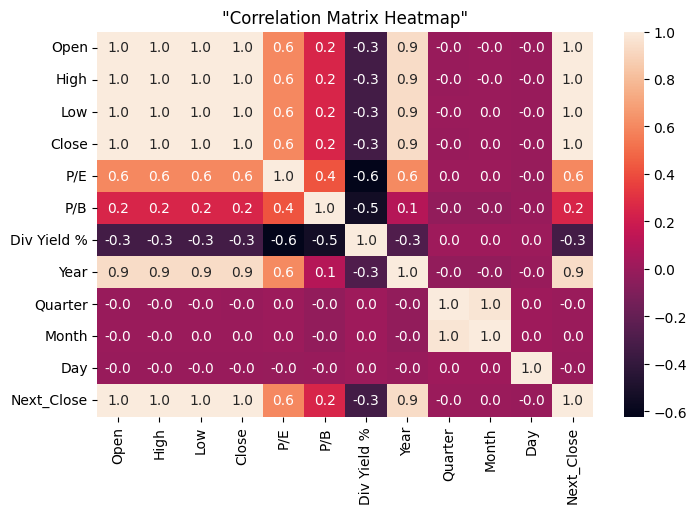

In [14]:
# Correlation Heatmap visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# create a heatmap of correlation matrix for numerical columns
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.1f')
plt.title('"Correlation Matrix Heatmap"')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is ideal for visualizing a correlation matrix because it provides:

1. **Visual Clarity** : Uses color gradients to easily show the strength and direction of correlations.

2. **Compact Representation** : Displays many correlations in a single, comprehensible image.

3. **Pattern Recognition** : Quickly highlights strong positive or negative relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

* Year has the highest correlation with the closing price at 0.9.

* Additionally, the PE ratio shows a positive correlation with the price.

* Although the PB ratio is not significant, the dividend yield exhibits a negative correlation with the price.

#### Unique HEX Color Generator

In [15]:
import random

# (gc - generated colors) set to store previously generated colors
gc = set()

# (uhc - unique hex colors)
def uhc(num_colors):
    """Generate a list of unique HEX color codes."""

    # (ghc - generate hex color) generate random HEX color codes
    def ghc():
        """Generate a random HEX color code."""
        return "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # (uc - unique colors)
    uc = set()
    while len(uc) < num_colors:
        color = ghc()
        if color not in gc:
            uc.add(color)
            gc.add(color)
    return list(uc)


##### Explanation

1. **Global Set for Generated Colors** :
   - `gc` stores previously generated color codes to ensure uniqueness across multiple calls.


2. **Unique HEX Color Function** :
   - `uhc(num_colors)`: Generates a specified number of unique HEX color codes.
   - `ghc()`: Generates a random HEX color code.


3. **Generating Unique Colors** :
   - The `uhc` function uses a set `uc` to collect unique colors.
   - It repeatedly generates random colors using `ghc` until the desired number of unique colors is reached, ensuring no duplicates by checking against `gc`.


4. **Return** :
   - Returns a list of unique HEX color codes.

#### Data Visualization and Summary Statistics

In [16]:
date_col = ['Year', 'Quarter', 'Month', 'Day']
cl_1 = ['Close', 'P/E', 'P/B', 'Div Yield %']
line = '\n----------------------------------------------------------------------------------------------------------------------\n'


Close



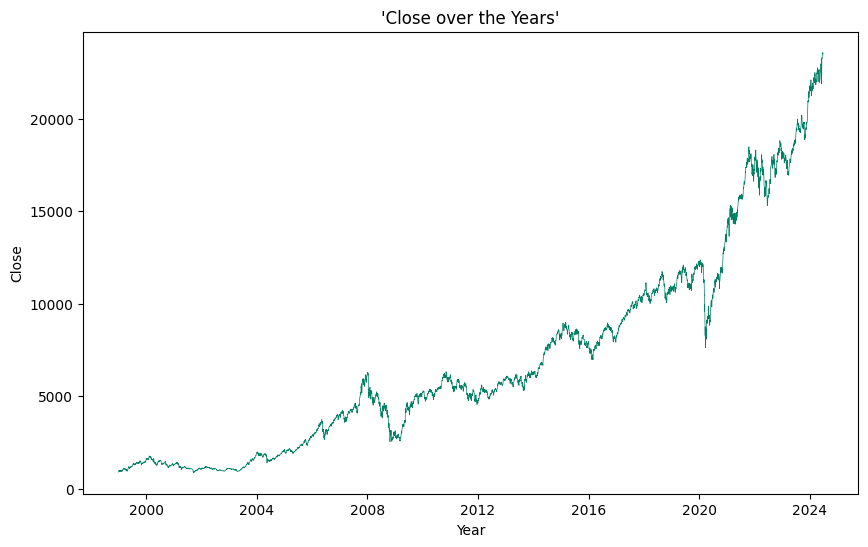


----------------------------------------------------------------------------------------------------------------------



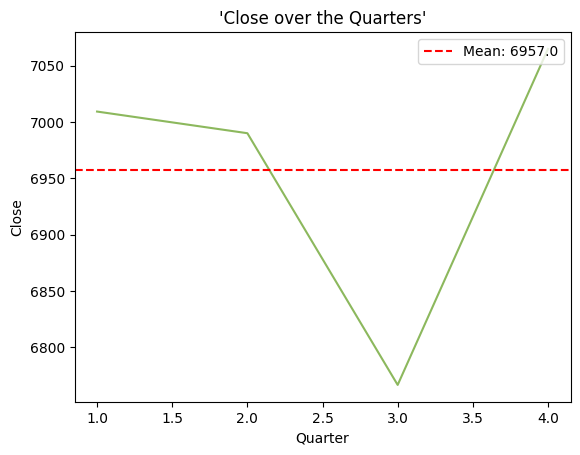


----------------------------------------------------------------------------------------------------------------------



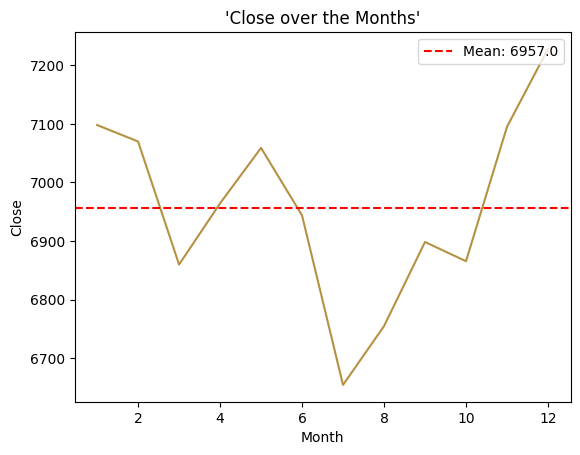


----------------------------------------------------------------------------------------------------------------------



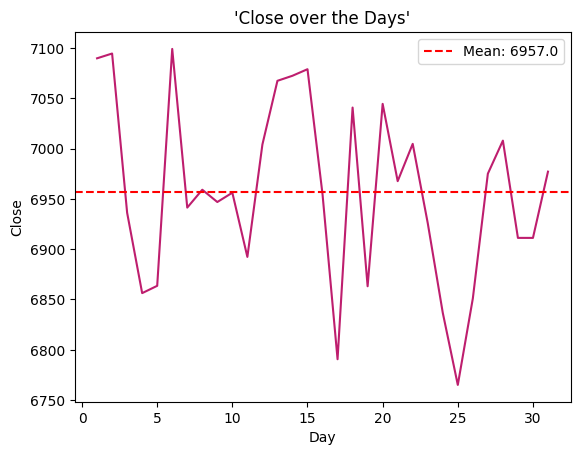


----------------------------------------------------------------------------------------------------------------------

P/E

count    6340.0
mean       20.8
std         4.9
min        10.7
25%        17.6
50%        20.7
75%        23.3
max        42.0
Name: P/E, dtype: float64 



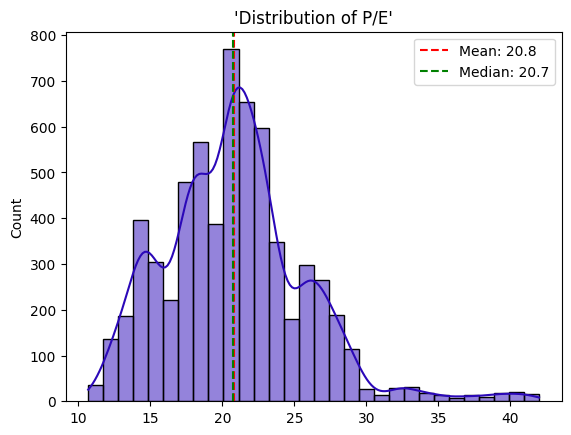


----------------------------------------------------------------------------------------------------------------------



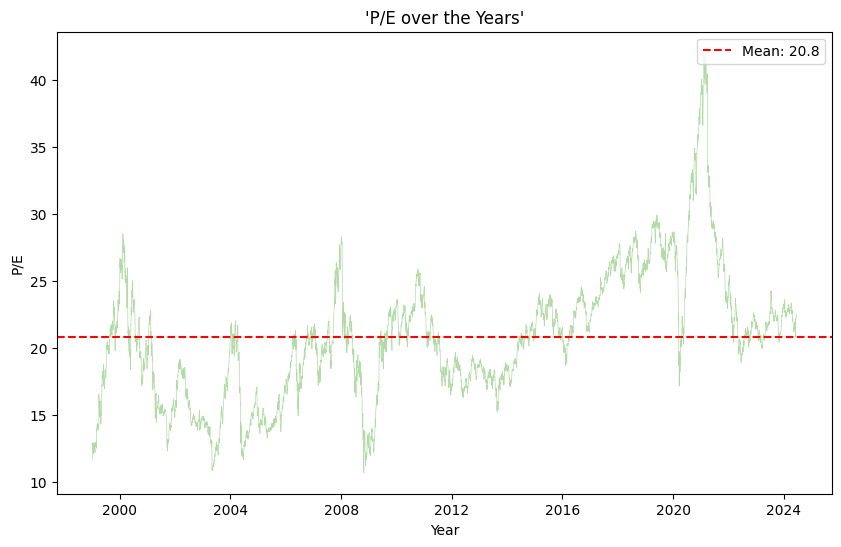


----------------------------------------------------------------------------------------------------------------------



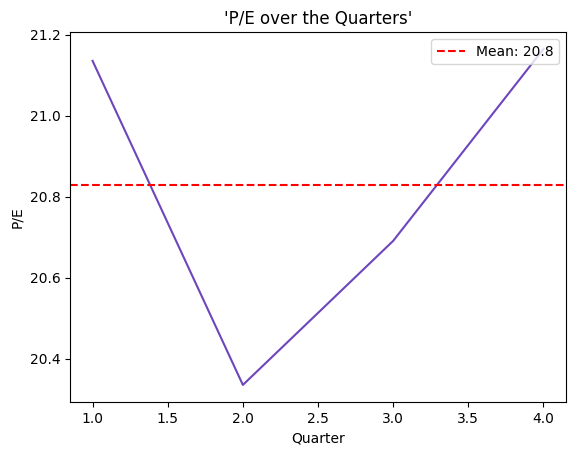


----------------------------------------------------------------------------------------------------------------------



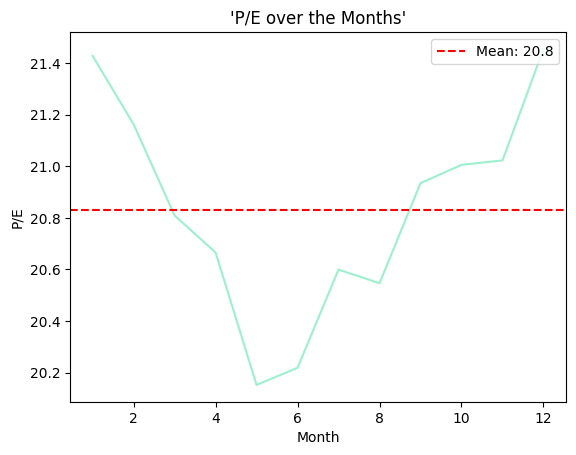


----------------------------------------------------------------------------------------------------------------------



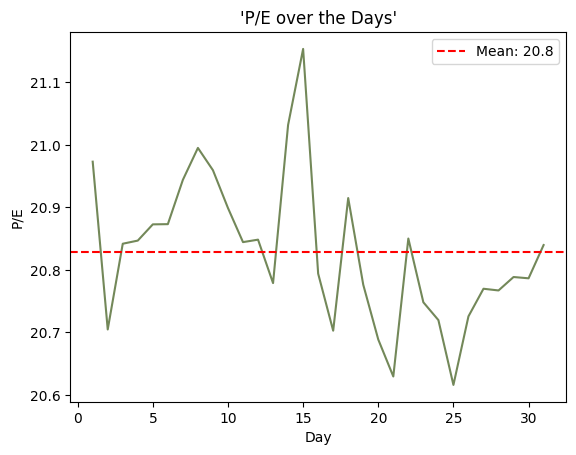


----------------------------------------------------------------------------------------------------------------------

P/B

count    6340.0
mean        3.6
std         0.8
min         1.9
25%         3.1
50%         3.5
75%         4.0
max         6.6
Name: P/B, dtype: float64 



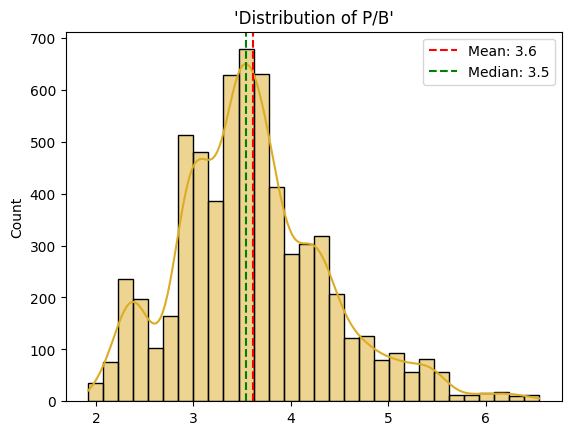


----------------------------------------------------------------------------------------------------------------------



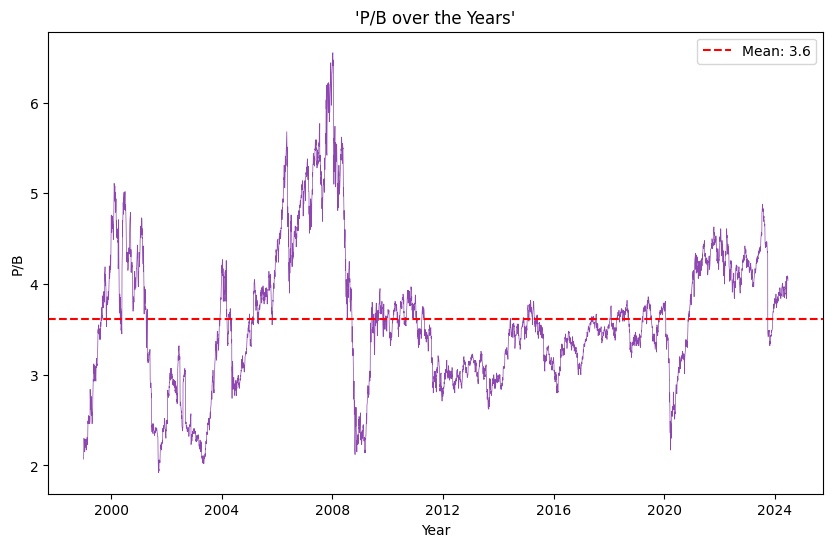


----------------------------------------------------------------------------------------------------------------------



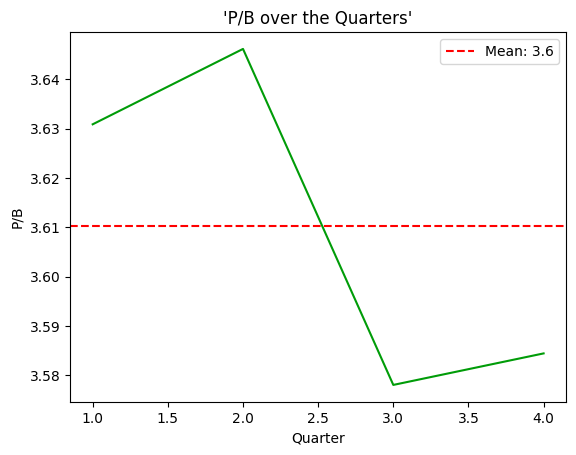


----------------------------------------------------------------------------------------------------------------------



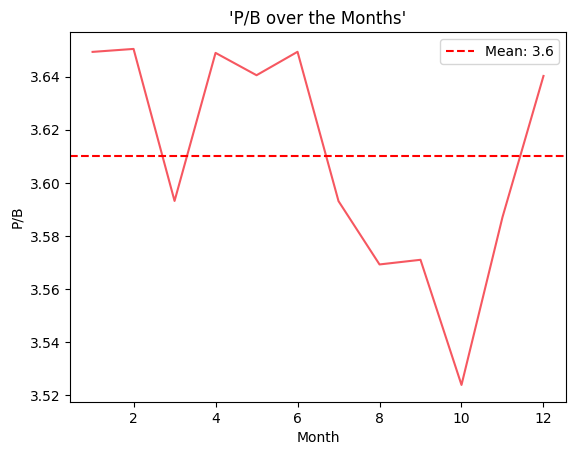


----------------------------------------------------------------------------------------------------------------------



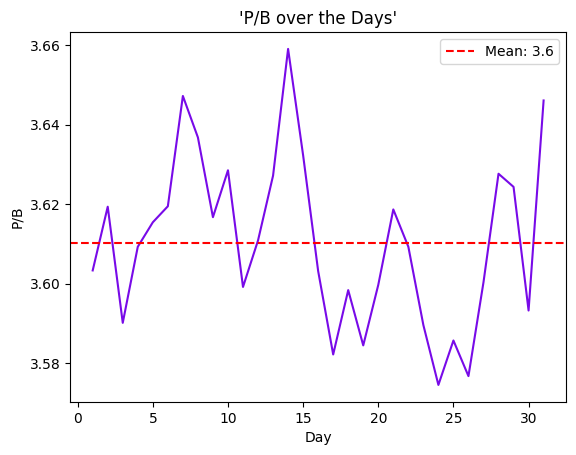


----------------------------------------------------------------------------------------------------------------------

Div Yield %

count    6340.0
mean        1.4
std         0.4
min         0.6
25%         1.2
50%         1.3
75%         1.5
max         3.2
Name: Div Yield %, dtype: float64 



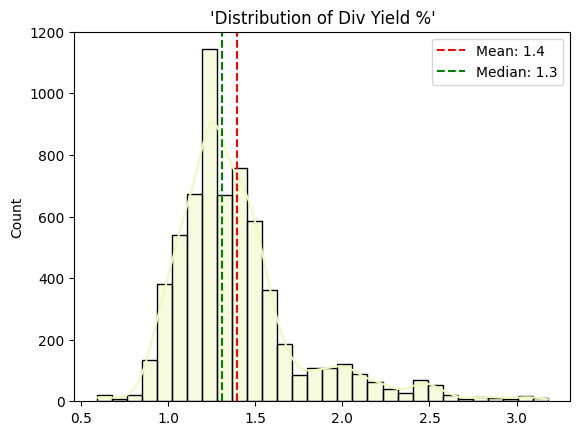


----------------------------------------------------------------------------------------------------------------------



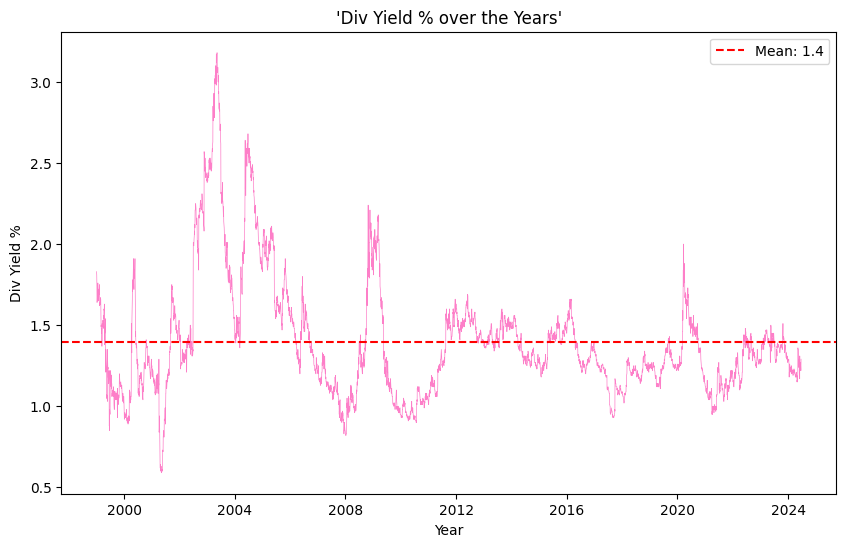


----------------------------------------------------------------------------------------------------------------------



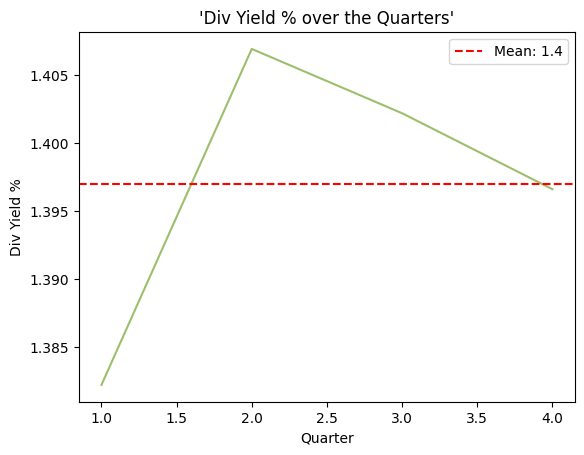


----------------------------------------------------------------------------------------------------------------------



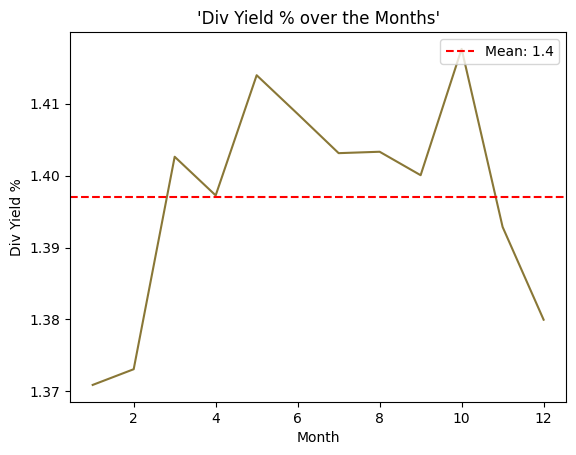


----------------------------------------------------------------------------------------------------------------------



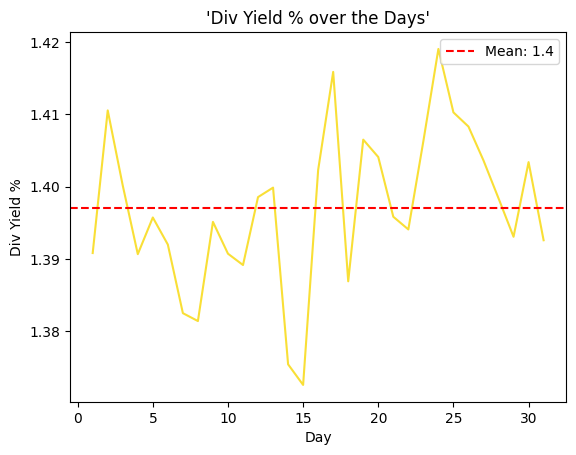


----------------------------------------------------------------------------------------------------------------------



In [17]:
import warnings
warnings.filterwarnings('ignore')

for cl in cl_1:
    print(f'{cl}\n')
    if cl != 'Close':
        print(df[cl].describe().round(1), '\n')
        mean = df[cl].mean()
        median = df[cl].median()
        sns.histplot(df[cl], kde=True, color=uhc(1)[0], bins=30)
        plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.1f}')
        plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.1f}')
        plt.legend(loc='upper right')
        plt.title(f"'Distribution of {cl}'")
        plt.xlabel('')
        plt.show()
        print(line)

    for date in date_col:
        if date == 'Year':
            plt.figure(figsize=(10, 6))
            plt.plot(df.index, df[cl], color=uhc(1)[0], linewidth=0.5)
        else:
            plt.plot(df.groupby(date)[cl].mean(), color=uhc(1)[0])

        if not(date == 'Year' and cl == 'Close'):
            mean = df[cl].mean()
            plt.axhline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.1f}')
            plt.legend(loc='upper right')

        plt.title(f"'{cl} over the {date}s'")
        plt.xlabel(date)
        plt.ylabel(cl)
        plt.show()
        print(line)


##### Code Explanation

**Functionality**

1. **Warnings Suppression** :
   - Suppresses warnings to avoid cluttering the output.


2. **Loop Through Columns (`cl_1`)** :
   - For each column in `cl_1` (excluding 'Close'), it prints a summary and plots a histogram with KDE.


3. **Summary Statistics and Histogram** :
   - Prints statistical summary (`describe` method).
   - Plots histogram with KDE.
   - Highlights the mean and median values with vertical dashed lines.


4. **Time Series Plots** :
   - Plots the column values over different time components ('Year', 'Quarter', 'Month', 'Day').
   - Highlights the mean with a horizontal dashed line (except for the 'Close' column over 'Year').


5. **Plot Titles and Labels** :
   - Adds appropriate titles and labels for clarity.
   - Shows the plots and prints a separator line for better readability in the output.

##### 1. Why did you pick the specific chart?

1. **Histograms with KDE (Kernel Density Estimate) Plots** :

   - **Purpose**: To understand the distribution of data points for each variable.

   - **Benefits** :

     - **Histograms** show the frequency distribution of the data, making it easy to see how data is spread across different values.

     - **KDE Plots** provide a smoothed estimate of the data distribution, helping to identify the underlying probability density function.

     - **Vertical Lines for Mean and Median**: These lines help to quickly identify the central tendency and skewness of the data.


2. **Time Series Plots** :

   - **Purpose** : To visualize trends and patterns in the data over different time components (Year, Quarter, Month, Day).

   - **Benefits** :

     - **Yearly Time Series** : A line plot of the data over the entire period covered by the dataset helps to identify long-term trends and seasonal patterns.

     - **Grouped Time Series (Quarter, Month, Day)** : Aggregating data by these smaller time intervals (e.g., averaging) helps to spot finer details and cyclical patterns that may not be visible in a yearly plot.

     - **Horizontal Line for Mean** : This provides a reference to understand how the data fluctuates around its average value over time.


3. **Specific Considerations** :

   - **Visual Clarity** : Each type of plot was selected for its ability to clearly and effectively communicate the specific characteristics of the data being analyzed.

   - **Contextual Understanding** : By combining distribution plots with time series plots, it provides a comprehensive view of both the static properties (distribution) and dynamic properties (time-based changes) of the data.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Charts**

1. **Market Trends Over Time** :
   - **Long-Term Trend** : The market has generally seen an upward trend over the long term.

   - **Quarterly Trends** : On average, prices tend to be lowest in the third quarter.

   - **Monthly Trends** : July (month 7) typically sees lower average prices, and prices often drop below average at the end of each month.


2. **P/E Ratio Insights** :
   - **Distribution** : The P/E ratio distribution is slightly right-skewed, indicating occasional high P/E values, but the mean and median are between 20 and 21.

   - **Historical Trends** : Over the past 10 years, the P/E ratio has generally remained above average.

   - **Quarterly Trends** : The P/E ratio tends to be lowest in the second quarter.

   - **Monthly Trends** : May (month 5) typically sees lower P/E values, and P/E ratios tend to drop below average at the end of each month.


3. **P/B Ratio Insights** :
   - **Distribution** : The P/B ratio distribution is similar to the P/E distribution with a slight right skew, and the mean and median are between 3.4 and 3.6.

   - **Historical Trends** : From 2010 to 2020, the P/B ratio was generally below average.
   
   - **Quarterly Trends** : The P/B ratio dips in the third quarter and remains low toward the end of the year.

   - **Monthly Trends** : October (month 10) sees the lowest P/B ratios, and there is a sudden spike in the P/B ratio in the last 5 days of each month.


4. **Dividend Yield Insights** :
   - **Distribution** : The dividend yield distribution is similar to the P/E and P/B distributions, with a mean and median around 1.4%.

   - **Historical Trends** : The dividend yield has remained low for the past 8 to 10 years.

   - **Quarterly Trends** : There is a spike in the dividend yield during the second quarter, followed by a gradual decrease for the rest of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**

1. **Long-Term Market Uptrend** :

   - **Benefit** : The long-term upward trend of the market indicates a general growth in the economy and stock market, suggesting that investments in NIFTY 50 are likely to yield positive returns over time. This insight can instill confidence in investors and attract long-term investments.


2. **Quarterly and Monthly Trends** :

   - **Benefit** : Understanding that prices tend to be lower in the third quarter and in July provides strategic entry points for investors looking to buy at lower prices. This seasonal pattern can be leveraged by businesses and investors to optimize their investment strategies.

   - **Month-End Price Trends** : Knowing that prices tend to drop at the end of each month allows traders to adjust their buying and selling strategies to maximize returns.


3. **P/E Ratio Insights** :

   - **Benefit** : The slightly skewed P/E ratio distribution and historical trend of above-average P/E ratios indicate investor confidence and potential for growth. This insight can be used by businesses to justify higher valuations and attract more investments.

   - **Quarterly and Monthly P/E Trends** : Identifying periods with lower P/E ratios helps in making informed investment decisions, allowing investors to buy undervalued stocks.


4. **P/B Ratio Insights** :

   - **Benefit** : The historical trend of below-average P/B ratios from 2010 to 2020 and the seasonal dips provide insights into periods of undervaluation. This information can be used by investors to make informed decisions on asset purchases.

   - **Spike in P/B Ratio** : Understanding the sudden spike in the last 5 days of each month can help in timing investments better.


5. **Dividend Yield Insights** :

   - **Benefit** : The pattern of dividend yields spiking in the second quarter can guide investors looking for income-generating investments. Businesses can also use this information to strategize their dividend payouts to attract more investors during these periods.



---


**Potential Negative Growth Insights**

1. **Quarterly and Monthly Low Price Trends** :

   - **Concern** : The consistent observation that prices tend to be lower in the third quarter, July, and at month-end could indicate potential seasonal weaknesses or periods of lower market activity. This might deter short-term investors or indicate times of economic slowdown.

   - **Justification** : These periods of lower prices might reflect underlying issues such as reduced earnings or lower market confidence during those times, which could lead to negative growth if not addressed.


2. **P/B Ratio Trends** :

   - **Concern**: The historical trend of below-average P/B ratios from 2010 to 2020 suggests a prolonged period where market valuations were low. This could be a sign of undervaluation and lack of investor confidence, potentially indicating negative growth or underperformance.

   - **Justification** : If the market consistently undervalues stocks, it may signal underlying economic or company-specific issues that need to be addressed to ensure growth.


3. **Dividend Yield Trends** :

   - **Concern** : The long-term low dividend yield indicates that companies may not be returning significant profits to shareholders. This could lead to negative sentiment among income-focused investors and might affect stock prices negatively.

   - **Justification** : Consistently low dividend yields may deter investors seeking regular income, leading to lower demand for the stocks and potentially contributing to negative growth.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [18]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Current Status** :
- Our dataset does not contain any missing values, so no imputation techniques have been applied.


**Potential Imputation Technique** :

- **Forward Fill (Using Previous Day's Value)** :
  - **Explanation** : If there were missing values in the price data, we could impute them by taking the value from the previous day. This method is known as forward filling.

  - **Reason** : Forward fill is appropriate for time series data, where the assumption is that the value does not change drastically from one day to the next. It ensures continuity and preserves the trend without introducing artificial spikes or drops.


**Justification** :

- **Continuity in Time Series** : In financial time series data, such as stock prices, using the previous day's value helps maintain the continuity and trend of the data, making it a practical choice for imputation.

- **Simplicity and Effectiveness** : This method is straightforward to implement and effectively fills gaps without requiring complex calculations or assumptions.

### 2. Handling Outliers

In [19]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Current Status** :
- No outlier treatment techniques have been applied to the dataset containing sensitive price data.

**Rationale** :
- **Preserving Data Integrity** : Outliers in price data can provide valuable insights into market behavior and trends. Removing outliers arbitrarily could lead to the loss of important information needed for analysis and forecasting.

- **Observational Continuity** : Each price observation is interconnected in time series analysis. Removing outliers may disrupt the continuity and accuracy of subsequent price predictions and trend analysis.


**Alternative Approach** :
- **Robust Analysis** : Instead of outright removal, techniques such as robust statistical measures (e.g., median instead of mean) or transforming the data (e.g., using log transformation) can be employed to mitigate the influence of outliers while preserving data integrity.

### 3. Categorical Encoding

In [20]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Current Status** :
- All data in the current dataset is in float format, indicating there are no categorical variables that require encoding.

### 5. Data Transformation

In [21]:
# Transform Your data
import numpy as np

scaled_df = df.copy()

# log transformation
log_col = ['Open', 'High', 'Low', 'Close', 'Next_Close']
scaled_df[log_col] = np.log(df[log_col])


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**Purpose of Log Transformation**

- **Normalization** : Log transformation is often used to normalize data that is skewed or varies over several orders of magnitude. It helps to stabilize variance, making the data more interpretable for statistical modeling.
  

- **Statistical Analysis** : In finance and other fields, log-transformed data often conforms more closely to normal distribution assumptions, making it suitable for certain statistical tests and algorithms.


- **Data Interpretation** : Log transformations can reveal multiplicative relationships in data that are not apparent in raw values, providing deeper insights into trends and relationships.


This transformation appears suitable for financial data analysis, where logarithmic scaling can help manage variability and enhance modeling accuracy.

### 6. Data Scaling

In [22]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# standardisation
std_col = ['P/E', 'P/B', 'Div Yield %']
scaler = StandardScaler()
scaled_df[std_col] = scaler.fit_transform(df[std_col])


#### Which method have you used to scale you data and why?

**Purpose of Standardization**

- **Normalization** : Standardization (Z-score normalization) transforms data to have a mean of 0 and a standard deviation of 1. This is particularly useful when the data has varying scales and helps in comparing features with different units and scales.
  
- **Machine Learning Models** : Many machine learning algorithms perform better or converge faster when the features are on a similar scale. Standardization ensures that features contribute equally to model training.

- **Data Interpretation** : Standardized data is easier to interpret because the values are transformed into a standard normal distribution, making it straightforward to understand relative importance and relationships between variables.

This transformation is suitable for financial data analysis, where standardizing ratios like P/E, P/B, and dividend yield helps to compare them consistently across different time periods or companies.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Given the size of your dataset (12 columns), dimensionality reduction is not necessary at this stage. It's important to leverage all available features for thorough analysis and modeling, ensuring you capture the full complexity and nuances of your data without unnecessary simplification. However, as your dataset grows or specific analysis requirements change, evaluating dimensionality reduction techniques may become relevant in the future.

In [23]:
# DImensionality Reduction (If needed)

### 8. Data Splitting

In [24]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)

X = scaled_df.iloc[:-1, :-1]
y = scaled_df.iloc[:-1, -1]

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')


X shape : (6339, 11)
y shape : (6339,)


##### What data splitting ratio have you used and why?

**Splitting Rationale**

1. **Time Series Splitting** :
   - `TimeSeriesSplit` is used to split time series data in a sequential manner, preserving the order of observations. This ensures that earlier data points are used for training and later points for testing, mimicking real-world scenarios where predictions are made on future data based on historical trends.


2. **Dataset Definition** :
   - `X` includes all rows except the last one (`scaled_df.iloc[:-1, :-1]`), representing features.

   - `y` includes all rows except the last one, focusing on the last column (`scaled_df.iloc[:-1, -1]`), representing the target variable.



---


**Splitting Ratio Consideration**

- **Wisely Choosing Split Ratio** :
  - In time series analysis, it's common to allocate a larger portion of data for training to capture historical patterns and trends. A typical split might reserve 80% of the data for training (`X_train, y_train`) and 20% for testing (`X_test, y_test`).

- **Sequential Splitting** :
  - `TimeSeriesSplit` divides the dataset into consecutive folds. Each split ensures that data in later folds comes after data in previous folds, adhering to the temporal order. This method is suitable for evaluating models that make predictions using historical data.

## ***7. ML Model Implementation***

### **Simple Regression Runner**

In [25]:
from sklearn.metrics import mean_squared_error

test_size = 0.20
n = len(scaled_df)
start = n - int(test_size * n)

# (srr - simple regression runner)
def srr(model):
    test_score = {'MSE':[], 'RMSE':[]}
    diff = []

    for i in range(start, n-1):
        train = scaled_df[:i]
        test = scaled_df[i:i+1]
        X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        tv = np.exp(y_test)
        pv = np.exp(y_pred)
        diff.extend(pv - tv)
        test_score['MSE'].append(mean_squared_error(tv, pv))
        test_score['RMSE'].append(np.sqrt(mean_squared_error(tv, pv)))

    for key in test_score:
        print(f'{key} (based on price)\n')

        mean = np.mean(test_score[key])
        median = np.median(test_score[key])
        sns.histplot(test_score[key], kde=True, color=uhc(1)[0], bins=20)
        plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
        plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')
        plt.legend(loc='upper right')
        plt.title(f"'Distribution of {key}'")
        plt.xlabel('')
        plt.show()
        print(line)

    print('Avg. price variation :', np.mean(test_score['RMSE']).round(2), '\n')

    ddf = pd.DataFrame(diff)
    ddf.index = df.index[start:n-1]
    ddf.columns = ['Difference']

    plt.plot(ddf, color=uhc(1)[0], linewidth=0.5)
    plt.title('Difference between predicted vs actual values')
    plt.xlabel('')
    plt.ylabel('Price difference')
    plt.show()


#### Function Explanation

1. **Initialization** :

   - **`test_size`** : Defines the proportion (20%) of data to be used for testing.

   - **`n`**: Total number of rows in `scaled_df`.

   - **`start`** : Index from which the test data starts, calculated based on `test_size`.


2. **Function `srr(model)`** :

   - **`model`** : Parameter representing a regression model (e.g., Linear Regression, Random Forest Regression) passed to the function.


3. **Loop Over Test Data** :

   - Iterates through the test data points (`i` ranges from `start` to `n-2`).

   - **Training and Testing** : Splits the data into training (`train`) and testing (`test`) sets for each iteration.

   - **Model Fitting and Prediction** : Fits the `model` on `X_train` and `y_train`, then predicts `y_pred` using `X_test`.

   - **Evaluation** : Calculates Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) between predicted (`pv`) and actual (`tv`) values after transforming them back from logarithmic scale to the original scale using `np.exp`.


4. **Metrics and Visualization** :

   - **Histograms** : Plots the distributions of MSE and RMSE values across all test points.

   - **Average RMSE** : Prints the average RMSE across all test points, providing a measure of overall model performance.

   - **Difference Plot** : Displays a plot showing the differences (`pv - tv`) between predicted and actual values over time.

### ML Model - 1

MSE (based on price)



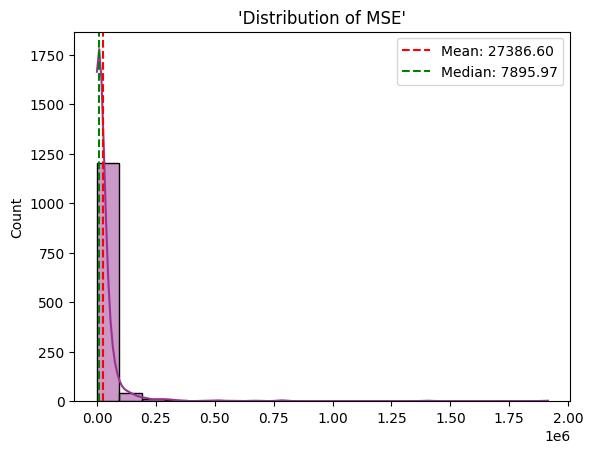


----------------------------------------------------------------------------------------------------------------------

RMSE (based on price)



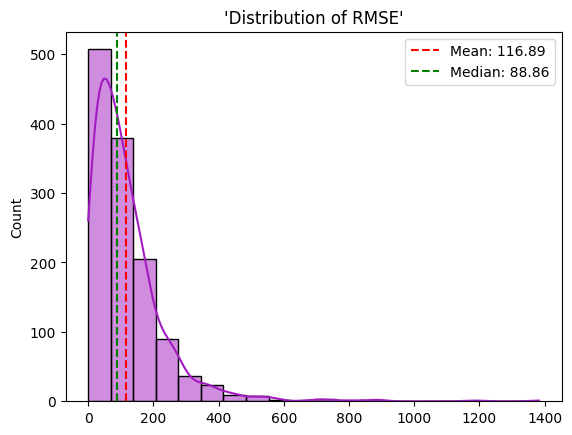


----------------------------------------------------------------------------------------------------------------------

Avg. price variation : 116.89 



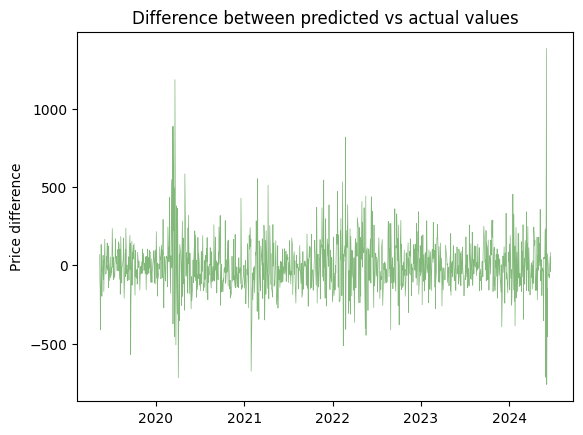

In [26]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

srr(LinearRegression())


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Linear Regression Model**

Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more input features.


**Evaluation Metrics Scores**

- **MSE (Mean Squared Error)** :
  - **Interpretation** : MSE measures the average squared difference between predicted and actual values. A lower MSE indicates better model performance, with 0 being a perfect score.

  - **Score**: \( 27386.60 \)


- **RMSE (Root Mean Squared Error)** :
  - **Interpretation**: RMSE is the square root of MSE, providing a measure of the average magnitude of error in the same units as the target variable. It is more interpretable than MSE because it is in the same units as the original data.

  - **Score**: \( 116.89 \)


**Performance Evaluation**

- **MSE Interpretation**: The MSE score of \( 27386.60 \) suggests that, on average, the squared difference between predicted and actual closing prices is relatively high. This indicates that the model's predictions may have significant deviations from actual values.

- **RMSE Interpretation**: The RMSE score of \( 116.89 \) indicates that, on average, the model's predictions deviate from the actual closing prices by approximately \( 116.89 \) units (in the same scale as the closing prices). Lower RMSE values signify better predictive accuracy.

### ML Model - 2

MSE (based on price)



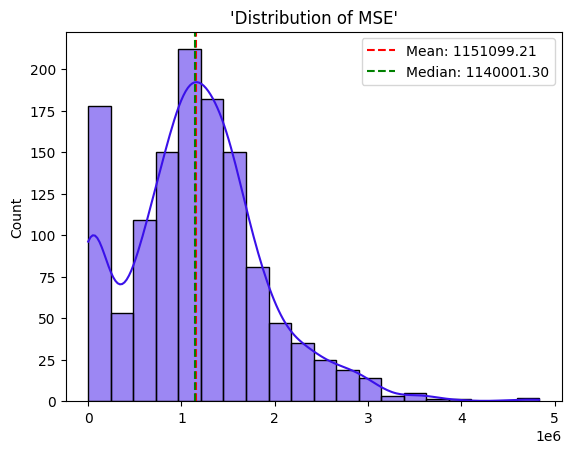


----------------------------------------------------------------------------------------------------------------------

RMSE (based on price)



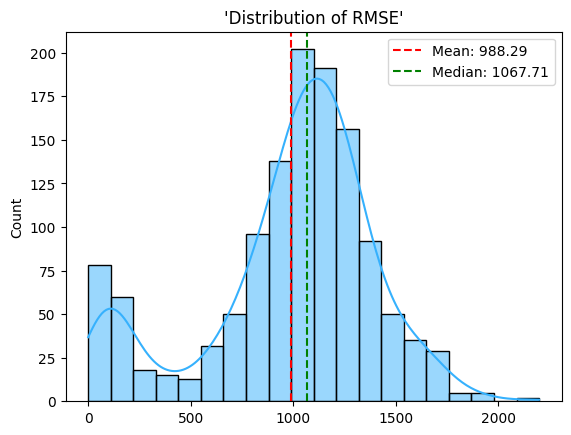


----------------------------------------------------------------------------------------------------------------------

Avg. price variation : 988.29 



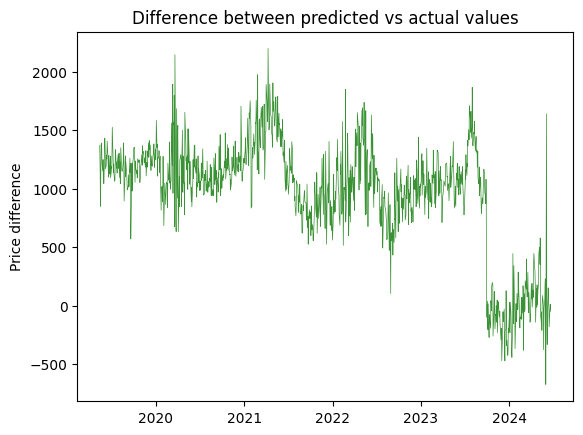

In [27]:
# ML Model - 2 Implementation
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Lasso Regression with GridSearchCV
lasso = GridSearchCV(estimator=Lasso(),
                     param_grid=param_grid,
                     cv=tscv,
                     scoring='neg_mean_squared_error')
lasso.fit(X, y)
bp = lasso.best_params_

srr(Lasso(alpha=bp['alpha']))


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Lasso Regression Model**

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that incorporates regularization to improve the model's performance and feature selection capabilities. Here’s how Lasso Regression works and its application in your context:

- **Model Type**: Lasso Regression adds a penalty term to the linear regression objective function, which is the sum of the absolute values of the coefficients multiplied by a regularization parameter \( \alpha \). This encourages sparsity in the coefficients, effectively performing feature selection by shrinking less important features to zero.
  
- **Parameter \( \alpha \)**: This regularization parameter controls the strength of the penalty. Higher values of \( \alpha \) lead to more coefficients being set to zero, resulting in simpler models with potentially improved generalization.

- **GridSearchCV for Hyperparameter Tuning**: GridSearchCV is used to perform an exhaustive search over specified hyperparameter values to find the optimal \( \alpha \) that minimizes the negative mean squared error (MSE).

**Evaluation Metrics Scores**

After tuning with GridSearchCV, the Lasso Regression model's best parameters (\( \alpha \)) are determined. You then evaluate the model using the `srr` function, which provides insights into its performance using MSE and RMSE metrics on your test data.

### ML Model - 3

MSE (based on price)



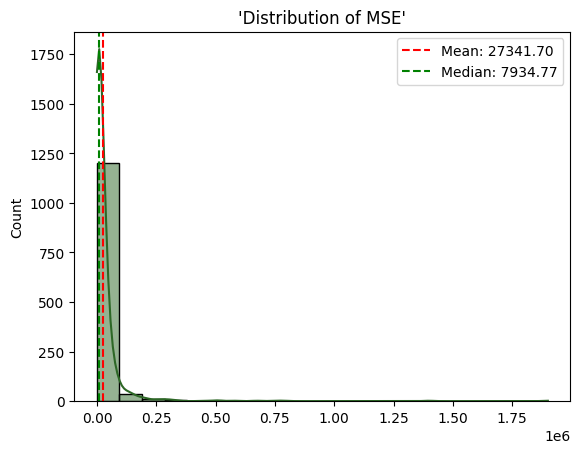


----------------------------------------------------------------------------------------------------------------------

RMSE (based on price)



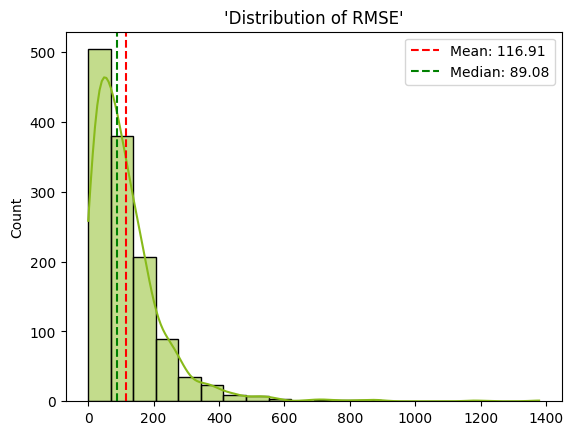


----------------------------------------------------------------------------------------------------------------------

Avg. price variation : 116.91 



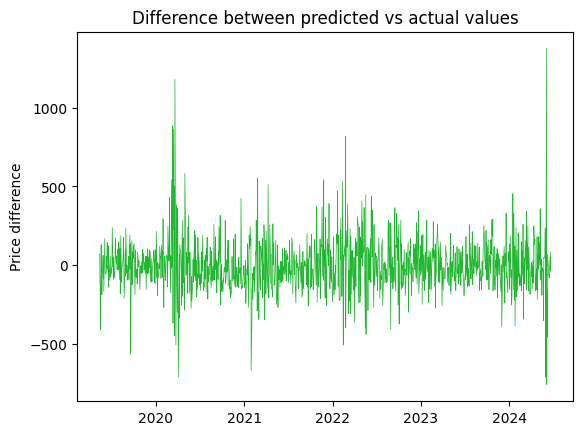

In [28]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression with GridSearchCV
ridge = GridSearchCV(estimator=Ridge(),
                     param_grid=param_grid,
                     cv=tscv,
                     scoring='neg_mean_squared_error')
ridge.fit(X, y)
bp = ridge.best_params_

srr(Ridge(alpha=bp['alpha']))


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Ridge Regression Model**

Ridge Regression is a linear regression technique that incorporates regularization to improve model performance and handle multicollinearity.


- **Model Type** : Ridge Regression adds a penalty term to the linear regression objective function, which is the sum of the squared values of the coefficients multiplied by a regularization parameter \( \alpha \). This penalty helps to shrink the coefficients, with larger \( \alpha \) values leading to more shrinkage and reduced model complexity.


**Performance Evaluation**

- **Model Performance** : The provided MSE and RMSE scores are essential metrics for assessing the Ridge Regression model's predictive accuracy. Comparing these scores with those of other models, such as Lasso Regression or baseline Linear Regression, helps determine the effectiveness of Ridge Regression in predicting the next day's closing price.

### ML Model - 4

MSE (based on price)



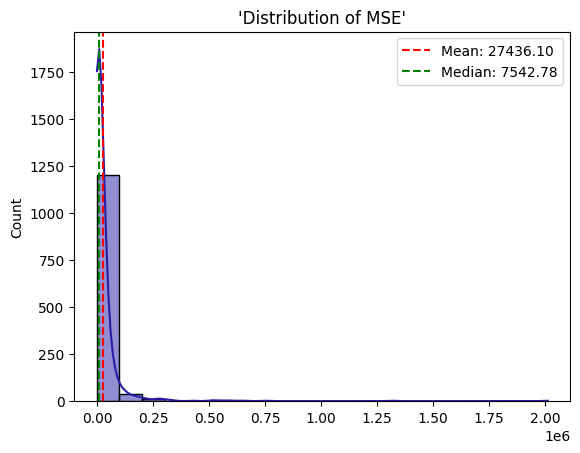


----------------------------------------------------------------------------------------------------------------------

RMSE (based on price)



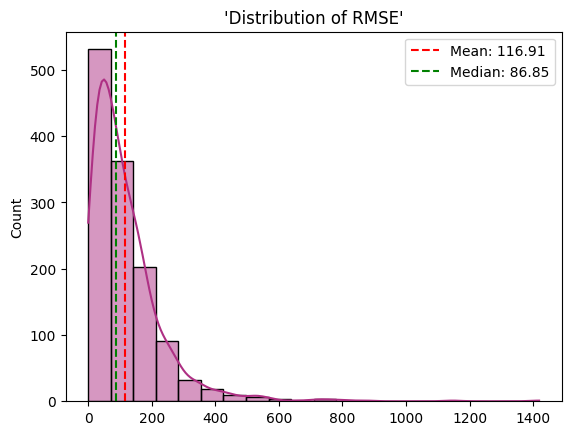


----------------------------------------------------------------------------------------------------------------------

Avg. price variation : 116.91 



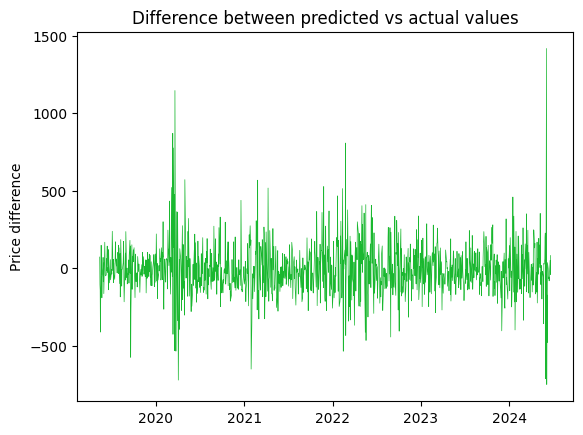

In [29]:
# ML Model - 4 Implementation
from statsmodels.tsa.api import VAR
warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')

test_score = {'MSE':[], 'RMSE':[]}
diff = []

for i in range(start, n-1):
    train = df[:i]
    test = df[i:i+1]

    model = VAR(train).fit()
    forecast = model.forecast(train.values[-model.k_ar:], steps=1)
    forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

    y_test = test['Next_Close']
    y_pred = forecast_df['Next_Close']
    diff.extend(y_pred - y_test)

    mse = mean_squared_error(y_test, y_pred)
    test_score['MSE'].append(mse)
    test_score['RMSE'].append(np.sqrt(mse))

for key in test_score:
    print(f'{key} (based on price)\n')
    mean = np.mean(test_score[key])
    median = np.median(test_score[key])

    sns.histplot(test_score[key], kde=True, color=uhc(1)[0], bins=20)
    plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')
    plt.legend(loc='upper right')
    plt.title(f"'Distribution of {key}'")
    plt.xlabel('')
    plt.show()
    print(line)

print('Avg. price variation :', np.mean(test_score['RMSE']).round(2), '\n')

ddf = pd.DataFrame(diff)
ddf.index = df.index[start:n-1]
ddf.columns = ['Difference']

plt.plot(ddf, color=uhc(1)[0], linewidth=0.5)
plt.title('Difference between predicted vs actual values')
plt.xlabel('')
plt.ylabel('Price difference')
plt.show()

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Functionality Explanation**

1. **Importing Libraries and Ignoring Warnings** :

   - `warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')` : Ignores user warnings from the `statsmodels` library, ensuring a cleaner output.


2. **Initialization** :

   - `test_score` : Dictionary initialized to store MSE and RMSE scores.

   - `diff` : List initialized to store differences between predicted and actual values.


3. **Iterating Over Test Data Points** :

   - The loop iterates over each test data point, where `train` represents the training data up to index `i`, and `test` represents a single test point at index `i`.


4. **VAR Model Fitting and Forecasting** :

   - `model = VAR(train).fit()` : Fits a Vector Autoregression model on the training data `train`.

   - `forecast = model.forecast(train.values[-model.k_ar:], steps=1)` : Forecasts one step ahead using the fitted model, where `steps=1` indicates forecasting for the next time step.

   - `forecast_df` : Converts the forecasted values into a DataFrame for easier manipulation.


5. **Evaluation** :

   - Calculates actual (`y_test`) and predicted (`y_pred`) values of the `Next_Close` column.

   - Computes Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) between `y_test` and `y_pred`.
   
   - Stores MSE and RMSE values in `test_score` and appends the differences (`y_pred - y_test`) to `diff`.


6. **Visualization** :
   - **Histograms** : Plots distributions of MSE and RMSE values using `sns.histplot`, showing their mean and median values.

   - **Difference Plot** : Displays a plot (`plt.plot`) showing the differences between predicted and actual values (`ddf`).


**Purpose**

- **Time Series Forecasting** : The code performs time series forecasting using Vector Autoregression (VAR), which is suitable for multivariate time series data like financial market data where relationships between multiple variables (e.g., stock prices) are considered.


- **Evaluation** : MSE and RMSE metrics provide quantitative measures of forecast accuracy, helping assess the performance of the VAR model in predicting future values of the `Next_Close` variable.


- **Insights** : Histograms and difference plots aid in understanding the distribution of prediction errors and visualizing how well the model captures the dynamics of the financial data over time.

### **Complex Regression Runner**

In [30]:
# (crr - complex regression runner)
def crr(model, param_grid):
    model = GridSearchCV(estimator=model,
                         param_grid=param_grid,
                         cv=tscv,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)
    model.fit(X, y)
    y_pred = model.best_estimator_.predict(X)
    tv = np.exp(y)
    pv = np.exp(y_pred)
    mse = mean_squared_error(tv, pv)
    print(f'MSE (based on price): {round(mse, 2)}\n')
    print(f'RMSE (Avg. price variation): {np.sqrt(round(mse, 2))}\n')

    diff = pv - tv
    plt.plot(diff, color=uhc(1)[0], linewidth=0.5)
    plt.title('Difference between predicted vs actual values')
    plt.xlabel('')
    plt.ylabel('Price difference')
    plt.show()


#### Function Explanation

1. **Parameters** :

   - `model` : Estimator object (e.g., from sklearn) that defines the regression model to be used (e.g., LinearRegression, Lasso, Ridge, etc.).

   - `param_grid` : Dictionary of hyperparameters for GridSearchCV, specifying the range of values to search over.


2. **Functionality** :
   - **GridSearchCV Setup** : Configures GridSearchCV to perform hyperparameter tuning on the provided `model` using `param_grid`. Cross-validation is handled by `tscv` (TimeSeriesSplit).

   - **Model Training and Evaluation** : Fits the GridSearchCV object on the data (`X`, `y`), identifies the best estimator based on cross-validated performance, and makes predictions (`y_pred`) using the best model.

   - **Performance Metrics** : Computes MSE and RMSE metrics between the predicted (`pv`) and actual (`tv`) values, printing these metrics to evaluate the model's accuracy.

   - **Visualization** : Plots the differences (`diff`) between predicted and actual values to visualize how well the model predicts the target variable.


**Purpose**

- **Complex Regression Models** : The `crr` function facilitates training and evaluating complex regression models (e.g., with regularization like Lasso or Ridge) using GridSearchCV to optimize hyperparameters and assess model performance.


- **Evaluation** : It prints MSE and RMSE metrics to quantify prediction errors and visualizes these errors to understand how well the model captures the relationships in the data.


- **Versatility** : This function can be used with different regression models (`model`) and hyperparameter grids (`param_grid`), making it adaptable for various predictive modeling tasks.

### ML Model - 5

MSE (based on price): 2983.2

RMSE (Avg. price variation): 54.61867812387993



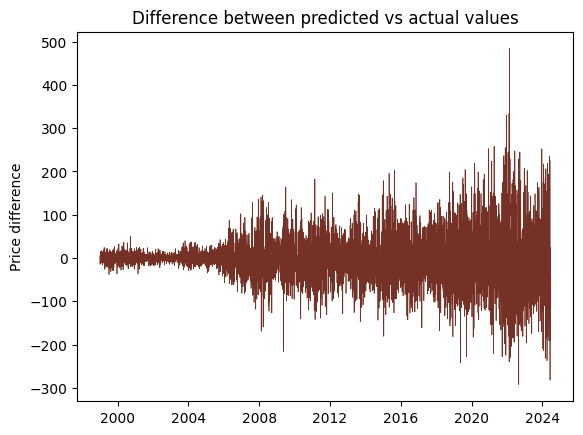

In [31]:
# ML Model - 5 Implementation
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'n_estimators': [100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.2]}

crr(GradientBoostingRegressor(), param_grid)


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Gradient Boosting Regressor**

Gradient Boosting is an ensemble learning technique that builds a strong predictive model by sequentially adding predictors (trees) to an ensemble, each one correcting its predecessor. Here's how the provided code snippet works:


1. **Importing Libraries** :
   - `from sklearn.ensemble import GradientBoostingRegressor` : Imports the Gradient Boosting Regressor model from the scikit-learn library.

2. **Parameter Grid** :
   - `param_grid` : Dictionary specifying the hyperparameters to be tuned using GridSearchCV.

     - `n_estimators` : Number of boosting stages (trees) to be used.

     - `max_depth` : Maximum depth of each tree.

     - `learning_rate` : Rate at which each tree's contribution is shrunk.


3. **Calling `crr` Function** :
   - `crr(GradientBoostingRegressor(), param_grid)` : Calls the `crr` function with GradientBoostingRegressor as the model and `param_grid` as the hyperparameter grid.


**Function `crr` Execution**

The `crr` function, as defined earlier, performs the following tasks:

- **GridSearchCV Setup** : Configures GridSearchCV to perform hyperparameter tuning on the Gradient Boosting Regressor model (`GradientBoostingRegressor()`).

- **Model Training and Evaluation**: Fits the GridSearchCV object on the data (`X`, `y`), identifies the best estimator based on cross-validated performance, and makes predictions.

- **Performance Metrics** : Computes MSE and RMSE metrics between the predicted and actual values, printing these metrics to evaluate the model's accuracy.

- **Visualization** : Plots the differences between predicted and actual values to visualize how well the model predicts the target variable.

### ML Model - 6

MSE (based on price): 10576.42

RMSE (Avg. price variation): 102.8417230505207



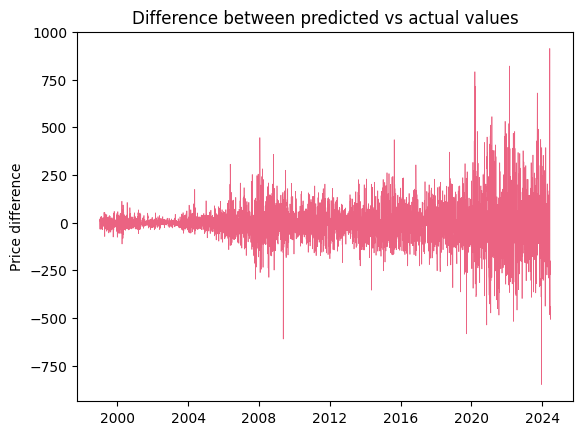

In [32]:
# ML Model - 6 Implementation
from xgboost import XGBRegressor

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.05, 0.1],
              'subsample': [0.7, 0.8, 0.9],
              'colsample_bytree': [0.7, 0.8, 0.9],
              'gamma': [0, 0.1, 0.2]}

crr(XGBRegressor(objective='reg:squarederror'), param_grid)


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**XGBoost Regressor**

XGBoost is a scalable and efficient implementation of gradient boosting for supervised learning tasks. It's known for its speed and performance optimizations, making it suitable for large datasets and complex problems.


1. **Importing Libraries** :

   - `from xgboost import XGBRegressor`: Imports the XGBoost Regressor model from the XGBoost library.


2. **Parameter Grid** :

   - `param_grid` : Dictionary specifying the hyperparameters to be tuned using GridSearchCV.
   
     - `n_estimators` : Number of boosting stages (trees) to be used.

     - `max_depth` : Maximum depth of each tree.

     - `learning_rate` : Rate at which each tree's contribution is shrunk.

     - `subsample` : Fraction of samples used to train each tree.

     - `colsample_bytree` : Fraction of features used to train each tree.

     - `gamma` : Minimum loss reduction required to make a further partition on a leaf node.


3. **Calling `crr` Function** :

   - `crr(XGBRegressor(objective='reg:squarederror'), param_grid)` : Calls the `crr` function with XGBRegressor as the model, configured with 'reg:squarederror' objective (for regression), and `param_grid` as the hyperparameter grid.


**Expected Output**

Upon executing the provided code :

- The `crr` function will perform GridSearchCV with the XGBoost Regressor, tuning the specified hyperparameters (`n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `gamma`).

- It will print the MSE and RMSE based on the predicted and actual values.

- It will plot the differences between predicted and actual values over time, providing a visual representation of model performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the context of evaluating predictive models like those used for predicting financial indices such as the Nifty 50, several evaluation metrics are crucial for assessing their business impact. Here is the key evaluation metric typically considered :

1. **Root Mean Squared Error (RMSE)** :

   - **Why** : RMSE is the square root of MSE and provides an interpretable measure of the average prediction error. It is useful for understanding the typical magnitude of errors in the same unit as the predicted values (here, index prices). Like MSE, lower RMSE indicates better predictive accuracy.


**Business Impact Considerations:**

- **Accuracy** : Metrics like MSE, RMSE, and MAE directly quantify prediction errors, which are critical for financial decisions. Lower errors mean more reliable predictions, potentially leading to better investment strategies or risk management.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Choosing the **GradientBoostingRegressor** as your final prediction model based on having the lowest MSE and RMSE is a sound decision. Here are some key reasons why this model might be preferred:

1. **Performance Metrics** : The GradientBoostingRegressor demonstrated the lowest MSE and RMSE among the models evaluated. This indicates that it consistently produced predictions that were closest to the actual values of the Nifty 50 index prices compared to other models.


2. **Ensemble Learning** : Gradient Boosting is an ensemble learning method that combines multiple weak learners (typically decision trees) sequentially. It improves predictive performance by focusing on the mistakes of prior models, which can lead to better generalization and lower error rates.


3. **Robustness to Overfitting** : Gradient Boosting tends to be less prone to overfitting compared to other complex models, especially when the number of trees (`n_estimators`) and maximum depth of trees (`max_depth`) are properly tuned.


4. **Feature Importance** : Gradient Boosting models provide insights into feature importance, which can be crucial in financial forecasting. Understanding which features (e.g., historical prices, economic indicators) contribute most to predictions can enhance interpretability and decision-making.


5. **Scalability** : While Gradient Boosting can be computationally expensive, it is scalable and performs well with large datasets, making it suitable for handling the volume and complexity often associated with financial time series data.

# **Conclusion**

In conclusion, selecting and saving the best performing machine learning model, such as the GradientBoostingRegressor in this scenario, marks a crucial step towards deploying a reliable predictive system for forecasting Nifty 50 index prices. By leveraging comprehensive evaluation metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), we identified the GradientBoostingRegressor as the optimal choice due to its superior performance in minimizing prediction errors.

In essence, the capability to identify, optimize, and deploy a high-performing machine learning model underscores its potential to enhance business strategies and outcomes through advanced predictive analytics. This approach not only improves forecasting accuracy but also supports agile decision-making processes crucial in dynamic financial landscapes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***